
---
## Plot Two Different Frequency Candles
---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
pd.__version__  # for the record
%matplotlib inline

'1.1.2'

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.7a18'

In [4]:
intraday = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
intraday.head(3)
intraday.tail(3)

(1563, 4)

,Open,Close,High,Low
Date,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43


,Open,Close,High,Low
Date,,,,
2019-11-08 15:57:00,3090.73,3090.70,3091.02,3090.52
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96


In [5]:
map = {'Open'  :'first',
       'High'  :'max',
       'Low'   :'min',
       'Close' :'last' 
      }

In [6]:
iday  = intraday.loc['2019-11-06 10:00':'2019-11-06 16:01',:]
iday1 = iday.resample('30T').agg(map).dropna()
iday2 = iday.resample( '5T').agg(map).dropna()

In [7]:
len(iday1)
len(iday2)
iday1.head(3)
iday2.head(3)

13

73

,Open,High,Low,Close
Date,,,,
2019-11-06 10:00:00,3074.63,3076.78,3073.75,3073.93
2019-11-06 10:30:00,3073.30,3075.06,3072.38,3072.59
2019-11-06 11:00:00,3072.64,3074.83,3072.55,3073.72


,Open,High,Low,Close
Date,,,,
2019-11-06 10:00:00,3074.63,3076.02,3074.45,3075.07
2019-11-06 10:05:00,3075.10,3076.02,3074.71,3075.35
2019-11-06 10:10:00,3075.38,3076.78,3074.94,3076.48


In [8]:
#pf.plot(iday1,type='candle',style='yahoo')
#pf.plot(iday2,type='candle',style='yahoo')

In [9]:
m1 = mpf.make_marketcolors(base_mpf_style='yahoo',alpha=0.2)
s1 = mpf.make_mpf_style(base_mpf_style='yahoo',y_on_right=False,marketcolors=m1)
s2 = mpf.make_mpf_style(base_mpf_style='yahoo',y_on_right=False)

In [10]:
%%capture
fig, axlist = mpf.plot(iday1,type='candle',style=s1,returnfig=True)

In [11]:
ax2 = axlist[0].twiny()

In [12]:
mpf.plot(iday2,type='candle',ax=ax2,style=s2)
ax2.set_axis_off()

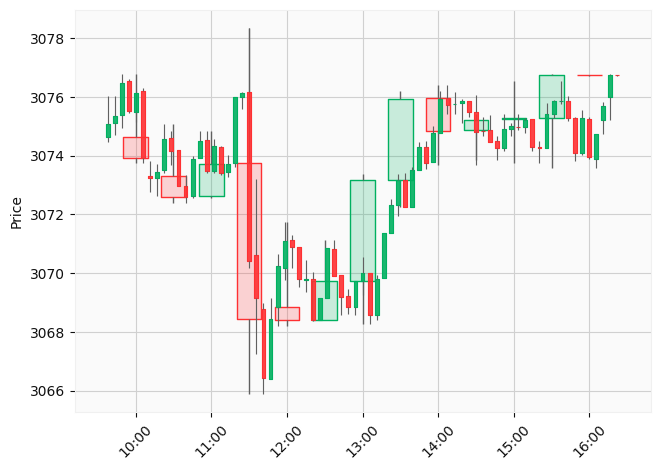

In [13]:
fig